In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!ls

 generator_grafu.py  'Mała analiza.ipynb'   przyklad2.graph
 logi_big.csv	      podejscie_1.py	    przyklad.graph
 logi_biger.csv       profiling_runner.py   __pycache__
 logi.csv	      przyklad1.graph	    readme.md


In [3]:
data = pd.read_csv('logi_biger.csv')

In [4]:
data.head()

parents  random  edges      time
0       10      49     76  0.000106
1       10     283    320  0.000381
2       10     244    259  0.000293
3       10     237    264  0.000322
4       10     331    369  0.000442

In [6]:
data['estimated'] = data.edges.values*np.log2(data.edges.values)

In [7]:
data.time.median(), data.estimated.median()

(0.08420276641845703, 900089.445641173)

In [10]:
data['estimated_time'] = data.estimated * (data.time.median() / data.estimated.median())

In [12]:
data['ratio'] = data.time/data.estimated_time

In [11]:
data.head()

parents  random  edges      time    estimated  estimated_time
0       10      49     76  0.000106   474.842491        0.000044
1       10     283    320  0.000381  2663.016990        0.000249
2       10     244    259  0.000293  2076.353347        0.000194
3       10     237    264  0.000322  2123.720048        0.000199
4       10     331    369  0.000442  3146.639015        0.000294

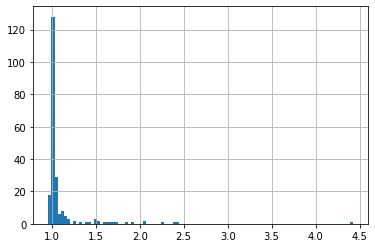

In [14]:
data.ratio.hist(bins = 100)

In [18]:
data[['ratio']].agg(['mean', 'std'])

ratio
mean  1.111370
std   0.323844

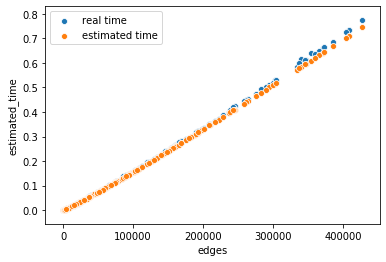

In [22]:
sns.scatterplot(data= data, x= 'edges', y ='time', label = 'real time')
sns.scatterplot(data= data, x= 'edges', y ='estimated_time', label = 'estimated time')